<a href="https://colab.research.google.com/github/python11312/projekt-transformacja/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

import numpy as np

from sklearn.model_selection import cross_val_score

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/projekt-transformacja'

/content/drive/My Drive/Colab Notebooks/projekt-transformacja


In [4]:
ls data

men_shoes.csv


In [6]:
df = pd.read_csv('data/men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [9]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [11]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error( y_true , y_pred )

63.968341227870624

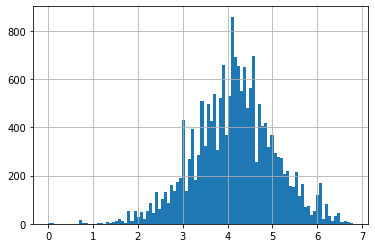

In [14]:
np.log( df['prices_amountmin'] + 1) .hist(bins = 100)

In [18]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error( y_true , y_pred )

58.01120240700219

In [19]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean(np.log1p(y_true) ) ) 
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error( y_true , y_pred )

58.03539547661041

In [20]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [21]:
df.brand.value_counts()

Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
Rock & Republic       1
Ranger                1
carhartt              1
Xray, XRay            1
Ocean Pacific         1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [36]:
feats = ['brand_cat']

x = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)
score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(score), np.std(score)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  x = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(score), np.std(score)

  run_model('brand_cat')

In [41]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
#run_model(['manufacturer'])

In [0]:
#def run_model(feats):
 # x = df[ feats ].values
  #y = df['prices_amountmin'].values

  #model = DecisionTreeRegressor(max_depth=5)
  #score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  #return np.mean(score), np.std(score)


In [0]:
#run_model(['manufacturer'])

In [0]:
#feats = ['manufacturer_cat']

#x = df[ feats ].values
#y = df['prices_amountmin'].values

#model = DecisionTreeRegressor(max_depth=5)
#score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
#np.mean(score), np.std(score)

In [0]:
#run_model(['manufacturer'],['brand_cat'])

In [0]:
#run_model(['manufacturer','brand_cat'])

In [0]:
#df.manufacturer.values_counts()

In [57]:
df.manufacturer.value_counts()

Puma                       476
Nike                       374
New Balance                249
VANS                       170
Reebok                     128
                          ... 
Broken T                     1
Tommy Bahama Group Inc.      1
DrMartens                    1
Ellie Shoes Inc              1
5150                         1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
feats = ['manufacturer_cat']
def run_code(feats):
  x = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(score), np.std(score)

In [68]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [70]:
run_model(['manufacturer_cat','brand_cat'])

(-58.53930419908596, 4.3112232316154415)

In [71]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


In [72]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [73]:
!git add matrix_one/day4.ipynb

fatal: pathspec 'matrix_one/day4.ipynb' did not match any files


In [74]:
ls

data/  day4.ipynb  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
!git add day4.ipynb

In [76]:
!git push-u origin master

git: 'push-u' is not a git command. See 'git --help'.


In [77]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
